In [333]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error

In [334]:
df=pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,39,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24981,37,99.00,99.00,99.00,99.00,-9.71,99.00,4.56,-8.30,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [335]:
df.shape

(24983, 101)

In [336]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Columns: 101 entries, 0 to 100
dtypes: float64(100), int64(1)
memory usage: 19.3 MB


In [337]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
count,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,...,24983.000000,24983.00000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000
mean,72.467478,34.401435,27.094089,33.263717,36.244936,0.427236,19.342119,-0.401803,-0.616110,36.228421,...,61.462019,60.27989,60.421701,59.059621,58.749897,58.541104,58.017246,57.061650,55.753357,60.138090
std,21.859600,46.707059,44.228006,46.747535,48.812967,5.472657,37.860770,5.741616,5.008894,48.228364,...,47.335405,47.94644,47.359847,48.196204,48.310728,48.130562,48.164681,48.717455,49.237139,47.913531
min,36.000000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,...,-9.950000,-9.95000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000
25%,53.000000,-0.150000,-2.180000,-1.145000,-3.350000,-3.690000,-0.390000,-5.290000,-4.610000,-1.775000,...,4.760000,3.59000,4.610000,3.250000,3.160000,3.300000,3.590000,2.670000,1.335000,3.930000
50%,72.000000,5.050000,3.690000,4.660000,3.450000,1.120000,3.540000,-0.050000,-0.290000,4.030000,...,99.000000,99.00000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
75%,100.000000,99.000000,99.000000,99.000000,99.000000,4.470000,8.010000,3.930000,3.060000,99.000000,...,99.000000,99.00000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
max,100.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.00000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000


In [338]:
df.isnull().sum().sum()

0

In [339]:
# replace '99' values NaNs by Nan because 99 mean 'not rate',to creat a test set!
df = df.replace(99, np.nan)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74.0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49.0,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,48.0,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [340]:
# Drop number of jokes rated by the user; we don't need this for our review matrix 

df = df.drop(labels=0, axis=1)      #or columns=[0]
df.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [341]:
#Finding the best- and the worst-rated jokes

average=df.mean()
average.sort_values(ascending=False)

50    3.665085
89    3.574720
36    3.312500
27    3.189821
32    3.155988
        ...   
13   -1.762882
57   -1.990664
44   -2.111891
16   -3.104818
58   -3.833880
Length: 100, dtype: float64

Validation Set

In [342]:
arr = df.values
print(arr.shape)

(24983, 100)


In [343]:
rated = np.where(arr!=99)
print(len(rated[0]), rated[1].shape)

2498300 (2498300,)


In [344]:
# Function to replace random ratings

def replace(orig, percentage=0.1):
    """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  
    """
    new_data = orig.copy()
    rated = np.where(arr!=99)
    n_rated = len(rated[0])
    idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
    new_data[rated[0][idx], rated[1][idx]] = 99
    return new_data, (rated[0][idx], rated[1][idx])

In [345]:
new_arr, idx = replace(arr, 0.1)

In [346]:
# Checking the old array doesn't have a 99
arr[idx[0][0], idx[1][0]]


-9.27

In [347]:
# Checking the new array does have a 99 (this is repeated for 10% of the data)
new_arr[idx[0][0], idx[1][0]]

99.0

In [352]:
n_latent_factors = 2

# Ratings matrix
user_ratings = df.values

# Initialise as random values
latent_user_preferences = np.random.random((real_data.shape[0], n_latent_factors))
latent_item_features = np.random.random((real_data.shape[1], n_latent_factors))

In [353]:
# Function to predict a rating
def predict_rating(user_id, item_id):
  """ Predict a rating given a user_id and an item_id.
  """
  # Finding the row for the user
  user_preference = latent_user_preferences[user_id]

  #Finding the item to predict
  item_preference = latent_item_features[item_id]

  # Dot product of these vectors
  return user_preference.dot(item_preference)



# Function to adjust the users' preferences and items' factors
def train(user_id, item_id, rating, alpha=0.0001):

  # Predict the rating (using the function above) and calculate its error with the real rate
  predicted_rating = predict_rating(user_id, item_id)
  err =  predicted_rating - rating

  # Storing the previous user preferences
  user_pref_values = latent_user_preferences[user_id]

  # Updating the users' preferences based on the item features and vice versa
  latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
  latent_item_features[item_id] -= alpha * err * user_pref_values # Note that this uses the users' preferences before updating
  return err

   # Stochastic Gradient Descent
def sgd(iterations):
  """ Iterate over all users and all items and train for 
      a certain number of iterations
  """
  mse_history = []
  for iteration in range(iterations):
    error = []
    # For each user and each item
    for user_id in range(latent_user_preferences.shape[0]):
      for item_id in range(latent_item_features.shape[0]):
        # Get the ground truth rating
        rating = user_ratings[user_id, item_id]
        # If it's not a NaN (testing) or 99 (validation)
        if not np.isnan(rating) and rating != 99.0:
          # Calculate and store the error, update the user preferences and item factors
          err = train(user_id, item_id, rating)
          error.append(err)
    # Calculate the MSE for all the predictions in an iteration
    mse = (np.array(error) ** 2).mean()   
    # If it's a multiple of X, print and store the MSE
    if (iteration % 1) == 0:
      print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
      mse_history.append(mse)
  return mse_history
    

Iteration 0/10:	MSE=26.140675
Iteration 1/10:	MSE=25.222217
Iteration 2/10:	MSE=24.935970
Iteration 3/10:	MSE=24.702688
Iteration 4/10:	MSE=24.472165
Iteration 5/10:	MSE=24.238859
Iteration 6/10:	MSE=24.003039
Iteration 7/10:	MSE=23.766189
Iteration 8/10:	MSE=23.530126
Iteration 9/10:	MSE=23.296730


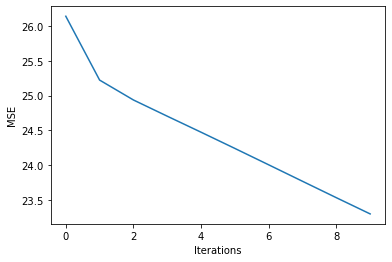

In [354]:
num_iter = 10
hist = sgd(num_iter) # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 1), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [362]:
# find mse in test data

real_rating = np.zeros(len(index[0]))
pred_rating = np.zeros(len(index[0]))

for i in range(len(index[0])):
    real_rating[i] = real_data[index[0][i],index[1][i]]
    pred_rating[i] = predict_rating(index[0][i],index[1][i])

    mse_error = mean_squared_error(real_rating, pred_rating)
print('mse from test set:',mse_error)

mse from test set: 23.07911245006264


In [363]:
df.iloc[4783, 55]

-0.05

In [364]:
df.iloc[12365, 47]

1.46

In [365]:
df.iloc[2755,10]

-4.22

In [366]:
df.iloc[17846, 4]

-4.08

In [432]:
df.iloc[1462 ,96]

4.66

In [367]:
#Movies Dataset

df2 = pd.read_excel("https://github.com/albanda/CE888/raw/master/lab4-recommender/movies_latent_factors.xlsx")

In [368]:
df2[df2['Movie ID']==955]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
72,955,Mission: Impossible II (2000),2.147918,-1.108062,-0.527386,-1.732132,-0.290501,-0.948425,-0.319341,0.132816,0.290238,0.162099,-0.269477,0.054957,-0.982375,1.547867,-0.997373


In [369]:
df2[df2['Movie ID']==4768]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15


In [370]:
df2.sort_values('Factor7',ascending=False)

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
90,8467,Dumb & Dumber (1994),2.720287,1.217620,-0.101601,-0.119204,1.279939,2.805066,3.524783,-1.283701,-0.133343,-1.343301,-1.009496,1.808762,-1.240696,0.279910,1.616338
85,3049,Ace Ventura: Pet Detective (1994),2.723720,0.745282,0.029587,-0.328153,0.685947,2.592889,3.457525,-0.780380,-0.219994,-1.313421,0.163827,0.573048,-0.324509,0.358344,0.128814
68,854,The Mask (1994),2.263142,-0.067761,-0.205463,0.068880,-0.189090,2.078554,2.444922,-0.075971,-0.674767,-0.198560,1.641380,-0.839276,-0.517086,-1.058431,-0.931746
5,24,Kill Bill: Vol. 1 (2003),-0.645019,1.997440,2.085625,-1.686559,-0.047874,-1.046274,1.613575,4.630243,0.276288,0.408997,-1.148072,0.269853,0.724543,-0.385681,1.036656
36,393,Kill Bill: Vol. 2 (2004),-0.322067,1.736348,1.882085,-1.624796,0.122520,-1.269396,1.497789,4.185528,0.053917,0.436027,-1.048859,0.434455,0.657099,-0.298533,0.888315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,568,Apollo 13 (1995),-0.110670,0.051392,-0.390299,-0.005018,-0.057010,0.371251,-1.238276,-0.178988,0.574858,0.319600,0.061646,0.548038,-0.455530,-0.465172,0.794058
77,1891,Star Wars: Episode V - The Empire Strikes Back...,-1.732354,-1.031041,2.221631,0.310886,-0.900830,2.306469,-1.847214,0.231435,-0.096332,-0.673135,-1.010806,0.657123,0.141075,0.998841,-0.115583
0,11,Star Wars: Episode IV - A New Hope (1977),-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
78,1892,Star Wars: Episode VI - Return of the Jedi (1983),-1.353408,-0.965083,2.099767,0.143335,-0.538405,2.495382,-1.925854,0.264722,-0.467617,-0.553613,-0.912548,0.737907,0.302659,0.969395,-0.102475


In [371]:
df2[df2['Movie ID']==5503]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
87,5503,The Fugitive (1993),0.206806,0.296018,-0.629832,-0.039671,-0.258177,0.195434,-0.720161,-0.185779,0.900727,0.707901,-0.01218,0.75186,-0.020147,-0.247167,-0.019788


In [372]:
df2[df2['Movie ID']==98]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
10,98,Gladiator (2000),-1.364852,-1.304136,-1.941623,-0.661007,0.128877,0.007048,0.371097,0.086026,-0.133839,0.548053,-0.827216,0.141476,0.735983,-0.3381,-0.175565


In [373]:
df2[df2['Movie ID']==13]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
2,13,Forrest Gump (1994),-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092


In [421]:
df2[df2['Movie ID']==2502]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
84,2502,The Bourne Supremacy (2004),-0.475977,-0.779477,-1.102297,-1.486113,-0.497708,-1.225494,0.099463,-0.323264,-0.122634,0.487992,-0.548203,2.24628,-1.574379,1.627139,0.043492


In [422]:
df2[df2['Movie ID']==604]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
51,604,The Matrix Reloaded (2003),0.503414,-2.00445,0.001084,-2.255945,0.882547,-0.1886,-0.235434,0.570028,-3.492897,-0.312214,0.902742,-2.063318,-1.895101,0.748458,2.120907


In [374]:
df2[df2['Movie ID']==1892]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
78,1892,Star Wars: Episode VI - Return of the Jedi (1983),-1.353408,-0.965083,2.099767,0.143335,-0.538405,2.495382,-1.925854,0.264722,-0.467617,-0.553613,-0.912548,0.737907,0.302659,0.969395,-0.102475


In [375]:
df2[df2['Movie ID']==558]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
43,558,Spider-Man 2 (2004),2.235223,-0.788129,0.596722,-0.400082,-1.246623,-1.507203,-0.219911,-0.486254,0.331657,-1.833755,-2.24334,-1.197938,-1.450812,-2.381119,-0.455753


In [376]:
df2[df2['Movie ID']==4768]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15


In [377]:
df2[df2['Movie ID']==36955]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
99,36955,True Lies (1994),1.734008,0.265436,-0.003391,-0.491754,-0.322739,0.850165,-0.150377,-0.075895,1.373386,0.934767,0.489299,-0.062678,0.333703,-0.223382,-0.022599


In [431]:
df2[df2['Movie ID']==24]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
5,24,Kill Bill: Vol. 1 (2003),-0.645019,1.99744,2.085625,-1.686559,-0.047874,-1.046274,1.613575,4.630243,0.276288,0.408997,-1.148072,0.269853,0.724543,-0.385681,1.036656


In [424]:
df2[df2['Movie ID']==120]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
14,120,The Lord of the Rings: The Fellowship of the R...,-2.247395,-2.510061,2.310822,0.37604,2.677432,-0.354463,1.133873,-0.751725,1.444931,1.348524,-0.22371,-0.495453,-0.859071,-0.167967,-0.27628


In [425]:
df2[df2['Movie ID']==122]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
16,122,The Lord of the Rings: The Return of the King ...,-2.27111,-2.5263,2.142566,0.341954,2.688624,-0.36061,1.140343,-0.932931,1.356982,1.331742,-0.454221,-0.620533,-0.638745,-0.172093,-0.314937


In [426]:
df2[df2['Movie ID']==155]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
21,155,The Dark Knight (2008),-2.169359,-1.131584,-0.23918,-0.556938,-1.473591,-0.739988,1.351486,-1.679131,0.133108,-0.943399,-1.135594,-0.179583,2.193465,0.720142,0.445634


In [434]:
df2[df2['Movie ID']==12]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
1,12,Finding Nemo (2003),-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993


In [438]:
df2[df2['Movie ID']==22]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
4,22,Pirates of the Caribbean: The Curse of the Bla...,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566


In [448]:
df2[df2['Movie ID']==105]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
11,105,Back to the Future (1985),-1.107666,-0.039506,0.109809,0.169149,-1.625467,1.673495,-0.544459,0.420603,1.184404,0.39653,1.240446,0.016825,-0.582166,-0.757412,0.118024


In [449]:
df2[df2['Movie ID']==603]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
50,603,The Matrix (1999),-3.063639,-1.319283,-0.043618,-0.994612,-0.954054,0.190838,0.197918,-0.093962,-1.08284,-0.003843,1.377453,-1.668189,-1.348377,0.223797,0.752413


In [452]:
df2[df2['Movie ID']==329]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
35,329,Jurassic Park (1993),-0.104238,-1.105404,-0.49763,0.459678,-1.146451,0.842279,0.224978,0.541354,1.570226,-0.633001,1.053255,-0.526942,0.082476,-0.005909,1.466918


In [379]:
# Q7 - In the movies dataset, what's the loading (i.e., value) of Factor11 for the movie with ID=4768?
# Give your answer with three decimal values (e.g., 0.123).
ind = mov_items.index[mov_items['Movie ID'] == 4768]
mov_items.loc[ind, 'Factor11']

Series([], Name: Factor11, dtype: float64)

In [380]:
# Q7 - In the movies dataset, what's the loading (i.e., value) of Factor1 for the movie with ID=36955?
# Give your answer with three decimal values (e.g., 0.123).
ind = mov_items.index[mov_items['Movie ID'] == 36955]
mov_items.loc[ind, 'Factor1']

99    1.734008
Name: Factor1, dtype: float64

In [433]:
# Q7 - In the movies dataset, what's the loading (i.e., value) of Factor14 for the movie with ID=12?
# Give your answer with three decimal values (e.g., 0.123).
ind = mov_items.index[mov_items['Movie ID'] == 12]
mov_items.loc[ind, 'Factor14']

1    0.506876
Name: Factor14, dtype: float64

In [381]:
# Q8 - In the movies dataset, which of the following IDs corresponds to the movie with the lowest loading of factor 11?
lowest = mov_items['Factor11'].min()
ind = mov_items.index[mov_items['Factor11'] == lowest][0]
mov_items.loc[ind, 'Movie ID']

558

In [430]:
# Q8 - In the movies dataset, which of the following IDs corresponds to the movie with the highest loading of factor 8?
highest = mov_items['Factor8'].max()
ind = mov_items.index[mov_items['Factor8'] == highest][0]
mov_items.loc[ind, 'Movie ID']

24

In [437]:
# Q8 - In the movies dataset, which of the following IDs corresponds to the movie with the lowest loading of factor 15?
lowest = mov_items['Factor15'].min()
ind = mov_items.index[mov_items['Factor15'] == lowest][0]
mov_items.loc[ind, 'Movie ID']

22

In [408]:
# Q9 - In the movies dataset, predict the rating that the user with ID 5323 will give to the movie with ID 955. Give your answer with two decimal values (e.g., 0.12).
user = mov_users.index[mov_users['User'] == 5323][0]
item = mov_items.index[mov_items['Movie ID'] == 955][0]
mov_users_arr = mov_users.drop(columns='User').values
mov_items_arr = mov_items.drop(columns=['Movie ID', 'Title']).values

In [409]:
def predict_rating_movies(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
     """
  # Finding the row for the user
    user_preference = mov_users_arr[user_id]

  #Finding the item to predict
    item_preference = mov_items_arr[item_id]

  # Dot product of these vectors
    return user_preference.dot(item_preference)

In [410]:
predict_rating_movies(user, item)

-0.03299932728636129

In [411]:
# Q9 - In the movies dataset, predict the rating that the user with ID 1882 will give to the movie with ID 414. Give your answer with two decimal values (e.g., 0.12).
user = mov_users.index[mov_users['User'] == 1882][0]
item = mov_items.index[mov_items['Movie ID'] == 414][0]
mov_users_arr = mov_users.drop(columns='User').values
mov_items_arr = mov_items.drop(columns=['Movie ID', 'Title']).values

In [412]:
def predict_rating_movies(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
     """
  # Finding the row for the user
    user_preference = mov_users_arr[user_id]

  #Finding the item to predict
    item_preference = mov_items_arr[item_id]

  # Dot product of these vectors
    return user_preference.dot(item_preference)

In [413]:
predict_rating_movies(user, item)

-0.2591570636736916

In [396]:
# Q10 - In the movies dataset, predict the rating that the user with ID 3048 will give to the movie with ID 641. Give your answer with two decimal values (e.g., 0.12).
user = mov_users.index[mov_users['User'] == 3048][0]
item = mov_items.index[mov_items['Movie ID'] == 641][0]
predict_rating_movies(user, item)

0.1488775918911852

In [439]:
# Q9 - In the movies dataset, predict the rating that the user with ID 1882 will give to the movie with ID 1597. Give your answer with two decimal values (e.g., 0.12).
user = mov_users.index[mov_users['User'] == 1882][0]
item = mov_items.index[mov_items['Movie ID'] == 1597][0]
mov_users_arr = mov_users.drop(columns='User').values
mov_items_arr = mov_items.drop(columns=['Movie ID', 'Title']).values

In [440]:
def predict_rating_movies(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
     """
  # Finding the row for the user
    user_preference = mov_users_arr[user_id]

  #Finding the item to predict
    item_preference = mov_items_arr[item_id]

  # Dot product of these vectors
    return user_preference.dot(item_preference)

In [441]:
predict_rating_movies(user, item)

-0.43340008491180093

In [442]:
# Q10 - In the movies dataset, predict the rating that the user with ID 4768 will give to the movie with ID 9741. Give your answer with two decimal values (e.g., 0.12).
user = mov_users.index[mov_users['User'] == 4768][0]
item = mov_items.index[mov_items['Movie ID'] == 9741][0]
predict_rating_movies(user, item)

-0.16782275356240917

In [443]:
# Q10 - In the movies dataset, predict the rating that the user with ID 4997 will give to the movie with ID 9802. Give your answer with two decimal values (e.g., 0.12).
user = mov_users.index[mov_users['User'] == 4997][0]
item = mov_items.index[mov_items['Movie ID'] == 9802][0]
predict_rating_movies(user, item)

-0.08839471464914639

In [397]:
# Q11 - In the movies dataset, if you had to recommend 2 movies to the user with ID=2067, which ones would you choose?
user = mov_users.index[mov_users['User'] == 2067][0]
pred_scores = []
for mov in range(mov_items.shape[0]):
    pred_score = predict_rating_movies(user, mov)
    pred_scores.append(pred_score)
og_pred_scores = pd.DataFrame(data=pred_scores)
og_pred_scores

,0
0,-0.239497
1,0.321743
2,0.828942
3,0.267385
4,-0.406868
...,...
95,0.261022
96,0.314247
97,-0.073809
98,-0.200035


In [398]:
pred_scores.sort()
sorted_pred_scores = pd.DataFrame(data=pred_scores)
sorted_pred_scores

,0
0,-2.000206
1,-1.982124
2,-1.959577
3,-1.882861
4,-1.825707
...,...
95,0.663749
96,0.696350
97,0.743205
98,0.817016


In [399]:
top2 = sorted_pred_scores.iloc[-2:].values
movie_idxs = []
for score in top2:
    movie_idx = og_pred_scores.index[og_pred_scores[0] == score[0]][0]
    movie_idxs.append(movie_idx)
movie_idxs

[10, 2]

In [400]:
for idx in movie_idxs:
    print('Movie ID:', mov_items.loc[idx, 'Movie ID'])

Movie ID: 98
Movie ID: 13


In [415]:
# Q11 - In the movies dataset, if you had to recommend 2 movies to the user with ID=5338, which ones would you choose?
user = mov_users.index[mov_users['User'] == 5338][0]
pred_scores = []
for mov in range(mov_items.shape[0]):
    pred_score = predict_rating_movies(user, mov)
    pred_scores.append(pred_score)
og_pred_scores = pd.DataFrame(data=pred_scores)
og_pred_scores

,0
0,-0.047545
1,0.215901
2,-0.097520
3,0.145204
4,-0.176766
...,...
95,0.065759
96,-0.080896
97,-0.228015
98,-0.193371


In [416]:
pred_scores.sort()
sorted_pred_scores = pd.DataFrame(data=pred_scores)
sorted_pred_scores

,0
0,-0.454890
1,-0.390364
2,-0.381373
3,-0.340844
4,-0.327231
...,...
95,0.314764
96,0.330325
97,0.389644
98,0.392447


In [417]:
top2 = sorted_pred_scores.iloc[-2:].values
movie_idxs = []
for score in top2:
    movie_idx = og_pred_scores.index[og_pred_scores[0] == score[0]][0]
    movie_idxs.append(movie_idx)
movie_idxs

[84, 51]

In [418]:
for idx in movie_idxs:
    print('Movie ID:', mov_items.loc[idx, 'Movie ID'])

Movie ID: 2502
Movie ID: 604


In [444]:
# Q11 - In the movies dataset, if you had to recommend 3 movies to the user with ID=4373, which ones would you choose?
user = mov_users.index[mov_users['User'] == 4373][0]
pred_scores = []
for mov in range(mov_items.shape[0]):
    pred_score = predict_rating_movies(user, mov)
    pred_scores.append(pred_score)
og_pred_scores = pd.DataFrame(data=pred_scores)
og_pred_scores

,0
0,-0.264427
1,0.533221
2,0.657465
3,-0.056698
4,-0.475016
...,...
95,0.546036
96,-0.441081
97,-0.014485
98,-0.208688


In [445]:
pred_scores.sort()
sorted_pred_scores = pd.DataFrame(data=pred_scores)
sorted_pred_scores

,0
0,-2.624699
1,-2.517166
2,-1.415296
3,-1.231091
4,-1.138454
...,...
95,0.708880
96,0.752899
97,0.950276
98,1.065579


In [450]:
top3 = sorted_pred_scores.iloc[-3:].values
movie_idxs = []
for score in top3:
    movie_idx = og_pred_scores.index[og_pred_scores[0] == score[0]][0]
    movie_idxs.append(movie_idx)
movie_idxs

[35, 11, 50]

In [451]:
for idx in movie_idxs:
    print('Movie ID:', mov_items.loc[idx, 'Movie ID'])

Movie ID: 329
Movie ID: 105
Movie ID: 603


In [401]:
# Q12 - In the movies dataset, if you had to recommend 3 movies to the user with ID=156, which ones would you choose?
user = mov_users.index[mov_users['User'] == 156][0]
pred_scores = []
for mov in range(mov_items.shape[0]):
    pred_score = predict_rating_movies(user, mov)
    pred_scores.append(pred_score)
og_pred_scores = pd.DataFrame(data=pred_scores)

pred_scores.sort()
sorted_pred_scores = pd.DataFrame(data=pred_scores)

top3 = sorted_pred_scores.iloc[-3:].values
movie_idxs = []
for score in top3:
    movie_idx = og_pred_scores.index[og_pred_scores[0] == score[0]][0]
    movie_idxs.append(movie_idx)

for idx in movie_idxs:
    print('Movie ID:', mov_items.loc[idx, 'Movie ID'])

Movie ID: 1892
Movie ID: 1891
Movie ID: 603


In [423]:
# Q12 - In the movies dataset, if you had to recommend 3 movies to the user with ID=2848, which ones would you choose?
user = mov_users.index[mov_users['User'] == 2848][0]
pred_scores = []
for mov in range(mov_items.shape[0]):
    pred_score = predict_rating_movies(user, mov)
    pred_scores.append(pred_score)
og_pred_scores = pd.DataFrame(data=pred_scores)

pred_scores.sort()
sorted_pred_scores = pd.DataFrame(data=pred_scores)

top3 = sorted_pred_scores.iloc[-3:].values
movie_idxs = []
for score in top3:
    movie_idx = og_pred_scores.index[og_pred_scores[0] == score[0]][0]
    movie_idxs.append(movie_idx)

for idx in movie_idxs:
    print('Movie ID:', mov_items.loc[idx, 'Movie ID'])

Movie ID: 120
Movie ID: 122
Movie ID: 155


In [453]:
# Q12 - In the movies dataset, if you had to recommend 3 movies to the user with ID=2067, which ones would you choose?
user = mov_users.index[mov_users['User'] == 2067][0]
pred_scores = []
for mov in range(mov_items.shape[0]):
    pred_score = predict_rating_movies(user, mov)
    pred_scores.append(pred_score)
og_pred_scores = pd.DataFrame(data=pred_scores)

pred_scores.sort()
sorted_pred_scores = pd.DataFrame(data=pred_scores)

top3 = sorted_pred_scores.iloc[-3:].values
movie_idxs = []
for score in top3:
    movie_idx = og_pred_scores.index[og_pred_scores[0] == score[0]][0]
    movie_idxs.append(movie_idx)

for idx in movie_idxs:
    print('Movie ID:', mov_items.loc[idx, 'Movie ID'])

Movie ID: 278
Movie ID: 98
Movie ID: 13
